<a href="https://colab.research.google.com/github/SajaFawagreh/SYSC4415/blob/main/W2025/Assignments/A1/SYSC4415_W25_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/W2025/Assignments/A1/SYSC4415_W25_A1.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Setup for local Running if you are not using Google Colab

Install [Anaconda distribution] (https://docs.anaconda.com/anaconda/install/)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn/sklearn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **waterqmark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.

To make sure you have all of the packages you need, install them with `conda`:

```
conda create -n SYSC4415_tutorials python=3.11
conda activate SYSC4415_tutorials

conda install jupyter
conda install numpy pandas scikit-learn matplotlib seaborn graphviz statsmodels
conda install -c conda-forge watermark

```

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

## NOTE about Signature in Google Colab:

Use `!pip install watermark` in Google Colab if you have errors while signing your notebook. If you work locally and follow the instructions above in the correct order, it should be already installed.

In [708]:
!pip install watermark

## General Instructions:

Please print out values when asked using Python's print() function with f-strings where possible.

Submit your saved notebook with all the outputs to Brightspace, but make sure that it will produce correct outputs upon restarting and click "runtime" → "run all" with clean outputs. Ensure your notebook displays all answers when this is clicked.

## Your Submission MUST contain your signature at the bottom.


In [709]:
# Name: Saja Fawagreh
# Student Number: 101217326

In [710]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz

## Section 1: Gradients (4 marks)
Hint: use attached PDF if you get lost.

In [711]:
"""
Q1a (1 mark)
- Manually derive and calculate the gradient of the function: f(x,y,z) = e^(x²) + y^y + e^(xy) + zcos(x) at point (0,1, 1)
- Show each component of the gradient.

Print your answer using print() function showing all three partial derivatives.
"""
from sympy import exp, cos, sin, log

x = 0
y = 1
z = 1

dfx = 2*x*exp(x**2) + y*exp(x*y) + -z*sin(x)
dfy = y**y*(log(y) + 1) + x*exp(x*y)
dfz = cos(x)
print(dfx, dfy, dfz)

1 1 1


In [712]:
"""
Q1b (1 mark)
For each component of the gradient calculated in Q1a:
- Explain what the value means geometrically
- Provide a conclusion about each term and gradient in general
"""

print("Each component of the gradient shows how the function changes when one variable \
increases while the others are held constant. The x-component represents the \
rate of change of the function with respect to x, and its positive value means \
the function increases as x increases near the point (0, 1, 1). The y-component \
shows how the function changes with respect to y, and its positive value \
indicates that increasing y also increases the function. The z-component \
represents the change with respect to z, and since it is positive, the function \
increases as z increases. Overall, the gradient points in the direction where \
the function increases most rapidly, and at this point the function increases \
in all three directions.")

Each component of the gradient shows how the function changes when one variable increases while the others are held constant. The x-component represents the rate of change of the function with respect to x, and its positive value means the function increases as x increases near the point (0, 1, 1). The y-component shows how the function changes with respect to y, and its positive value indicates that increasing y also increases the function. The z-component represents the change with respect to z, and since it is positive, the function increases as z increases. Overall, the gradient points in the direction where the function increases most rapidly, and at this point the function increases in all three directions.


In [713]:
"""
Q1c (2 marks)
Write a Python function to verify your gradient calculation numerically:
1. Implement the function f(x,y,z)
2. Calculate numerical approximations of partial derivatives using small perturbations
3. Compare your analytical results from Q1a with numerical approximations
4. Report the result of function evaluation at the point (0,1,1)
"""

# Function implementation
f = lambda x, y, z: exp(x**2) + y**y + exp(x*y) + z*cos(x)

# Numerical derivatives using small perturbations
h = 1e-5

dfx_num = (f(x + h, y, z) - f(x, y, z)) / h
dfy_num = (f(x, y + h, z) - f(x, y, z)) / h
dfz_num = (f(x, y, z + h) - f(x, y, z)) / h

# Compare analytical and numerical gradients
print("Comparison of analytical and numerical gradients:\n")
print("Analytical gradient:", dfx, dfy, dfz)
print("Numerical gradient:", dfx_num, dfy_num, dfz_num)
print("The analytical and numerical gradients are approximately equal.")

# Function value at (0,1,1)
print("\nFunction value at (0,1,1):\n")
print("f(0,1,1) =", f(0, 1, 1))

Comparison of analytical and numerical gradients:

Analytical gradient: 1 1 1
Numerical gradient: 1.00000999996297 1.00001000005179 0.999999999962142
The analytical and numerical gradients are approximately equal.

Function value at (0,1,1):

f(0,1,1) = 4


## Section 2: Data Analysis (8 marks)

This section uses the Palmer Penguins dataset, which contains measurements from three penguin species.
The dataset includes physical measurements like bill length, bill depth, flipper length, and body mass. We are building a penguin classifier. First we need to assess out data.

In [714]:
"""
Q2a (1 mark)
✅ Load the Palmer Penguins dataset using Seaborn's load_dataset (provided)
- Show that it contains valid data
- Create variables for numerical features and labels
- Perform basic statistical analysis by printing the general statistics table as in Tutorials.
- Find missing values and drop records with missing values for any feature
- Save entries with missing values for "sex" in a separate variable, we'll use it later.
"""

# Load data
penguins = sb.load_dataset("penguins")

# Show valid data
print("Preview of dataset to confirm valid data:\n")
print(penguins.head())
print("\n")
print(penguins.info())

# Create variables for numerical features and labels
numerical_features = penguins.select_dtypes(include=["float64"])
labels = penguins.select_dtypes(include=["object"])

# Basic statistical analysis
print("\nGeneral statistics table for numerical features:\n")
print(numerical_features.describe())

# Find missing values
print("\nChecking missing values in each column:\n")
print(penguins.isnull().sum())

# Save entries with missing sex
missing_sex = penguins[penguins["sex"].isnull()]

# Drop rows with any missing values
penguins_clean = penguins.dropna()

Preview of dataset to confirm valid data:

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_

Scatterplot matrix:



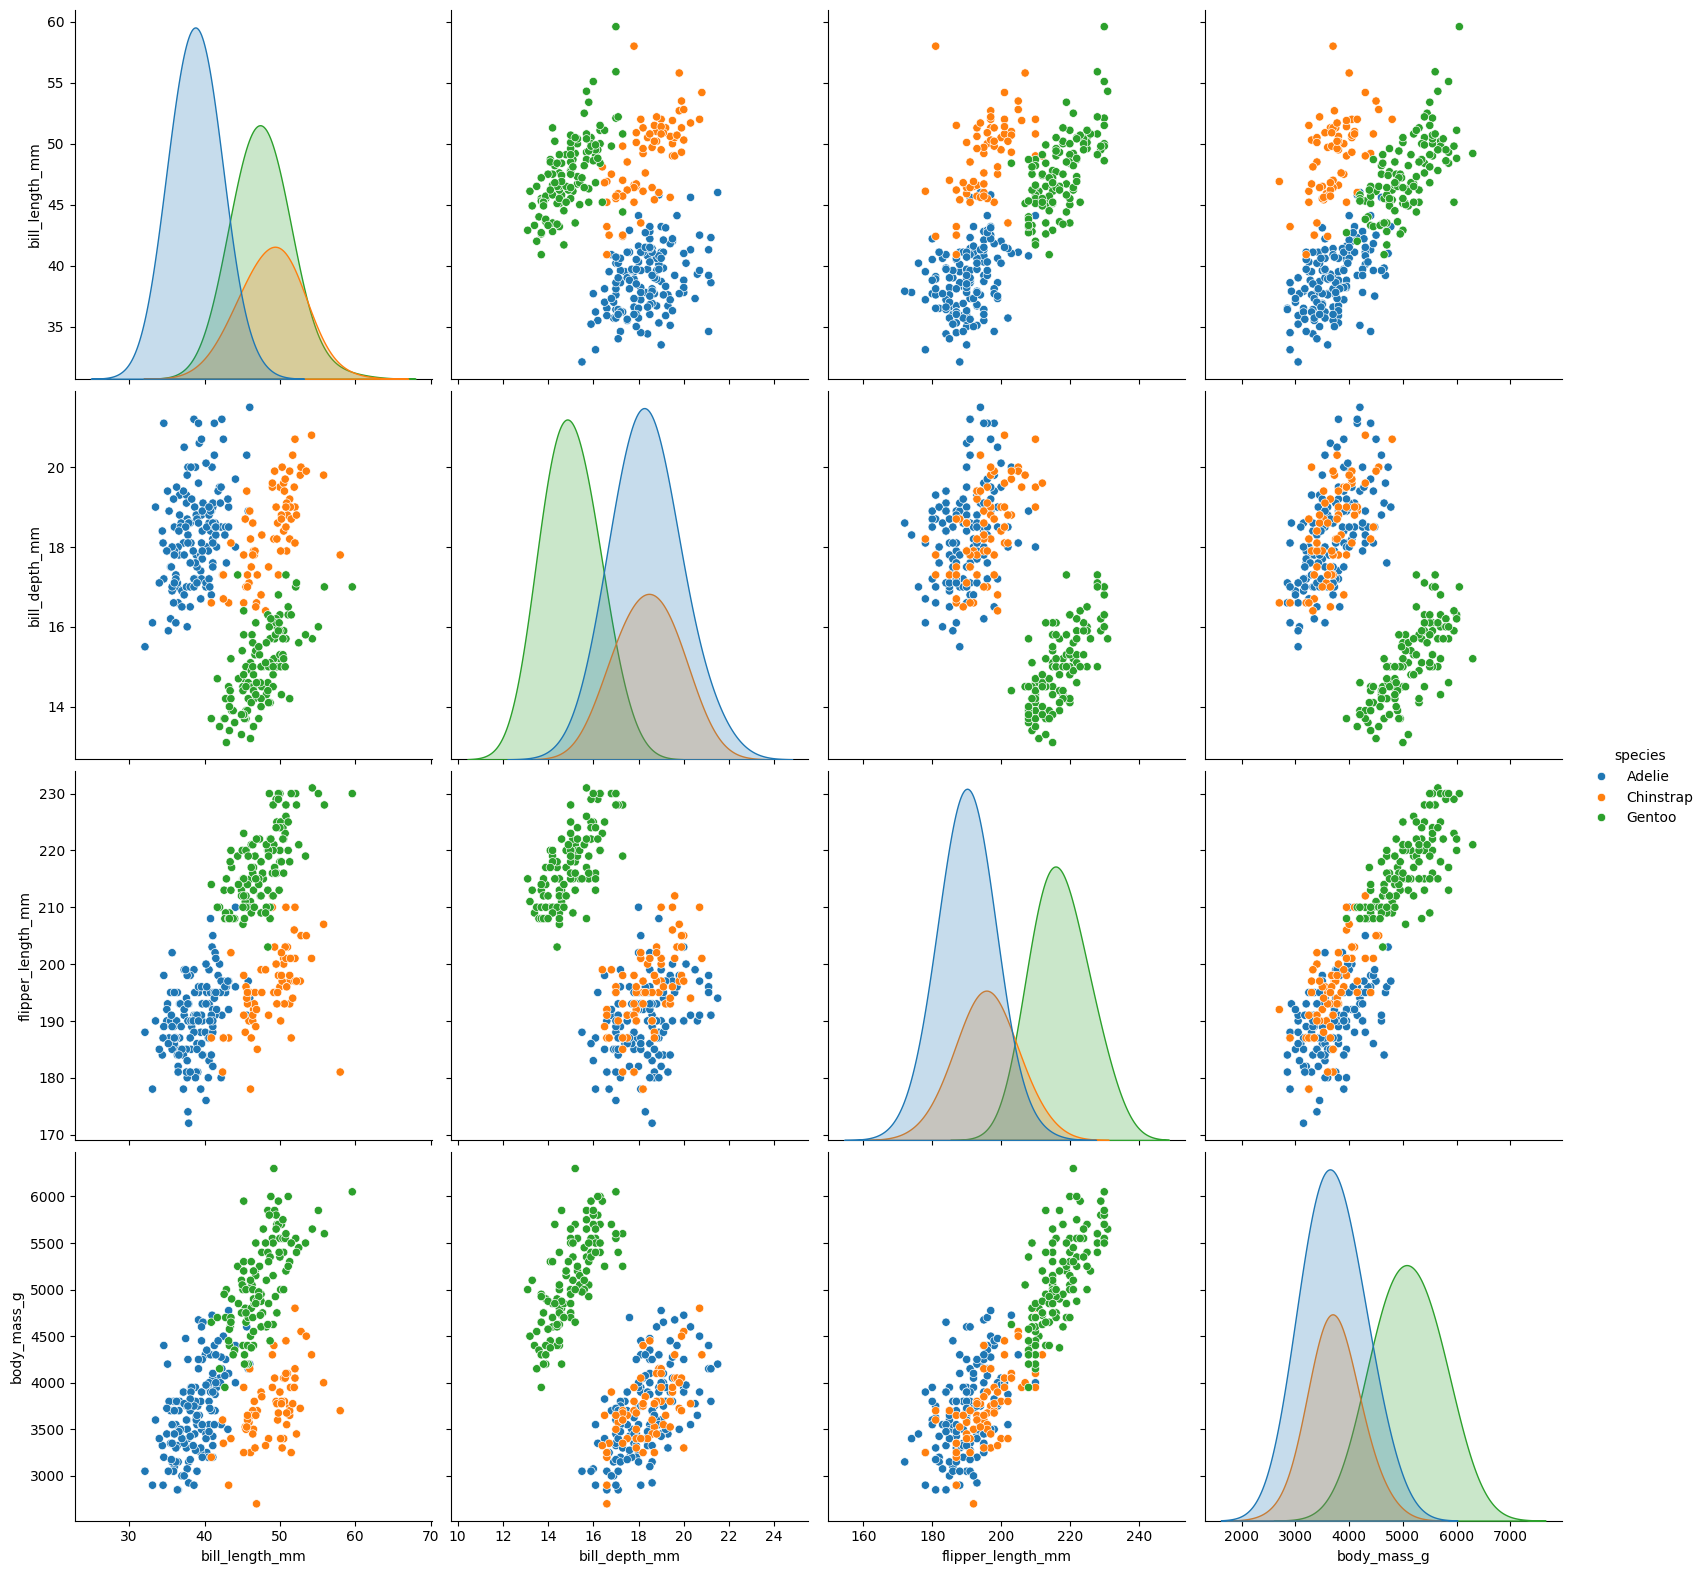


Histograms for Adelie and Gentoo penguins body mass distribution:



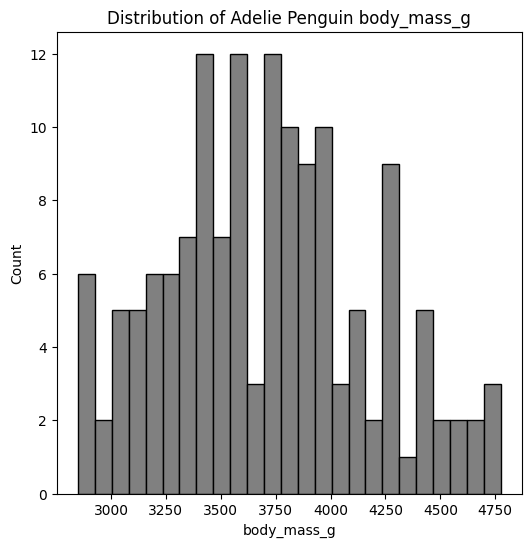

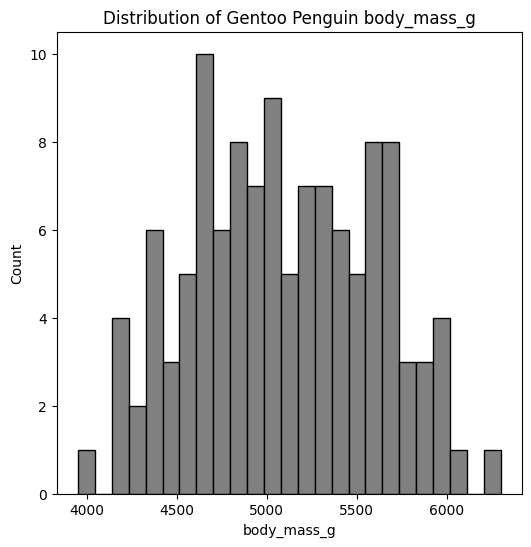

In [715]:
"""
Q2b (2 marks)
Create visualizations showing:
- Create scatterplot matrix for visual assessment of data
- Identify one feature with outliers and show distribution values for two classes (2 histograms).
"""

# Scatterplot matrix to visually assess data
print("Scatterplot matrix:\n")
sb.pairplot(penguins_clean, hue='species', diag_kws={'bw_method': 0.9}, height=4)
plt.show()

print("\nHistograms for Adelie and Gentoo penguins body mass distribution:\n")

adelie_penguins = penguins_clean[penguins_clean['species'] == 'Adelie']
gentoo_penguins = penguins_clean[penguins_clean['species'] == 'Gentoo']

var2plot = 'body_mass_g'

# Histogram for Adelie body mass
plt.figure(figsize= (6,6))
plt.hist(adelie_penguins[var2plot], bins=25, color= 'grey', edgecolor= 'black')
plt.xlabel(var2plot)
plt.ylabel("Count")
plt.title(f"Distribution of Adelie Penguin {var2plot}")
plt.show()

# Histogram for Gentoo body mass
plt.figure(figsize= (6,6))
plt.hist(gentoo_penguins[var2plot], bins=25, color= 'grey', edgecolor= 'black')
plt.xlabel(var2plot)
plt.ylabel("Count")
plt.title(f"Distribution of Gentoo Penguin {var2plot}")
plt.show()


Class count:

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

Class proportions:

species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: count, dtype: float64

Visualization of class proportions:



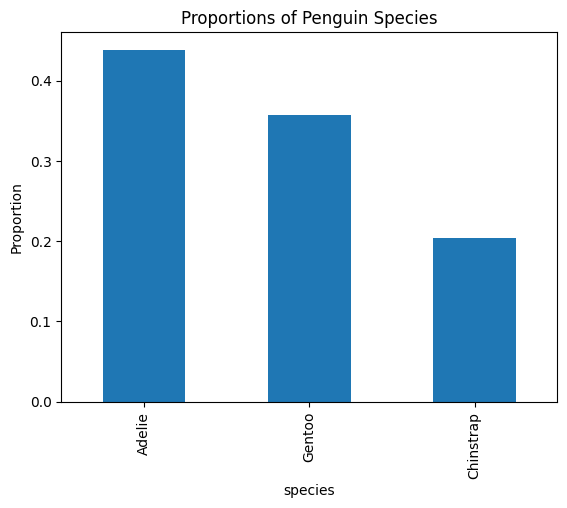


From the bar graph, Adelie and Gentoo appear more frequently than Chinstrap. This indicates a slight imbalance in the dataset, with one class having fewer samples. Because machine learning models learn from available examples, the model may be more likely to predict the species that appear more often.


In [716]:
"""
Q2c (1 mark)
Analyze class distribution and discuss implications for model training:
- Calculate and visualize class proportions
- Identify any class imbalance
"""

class_count = penguins_clean["species"].value_counts()
class_proportions = class_count / len(penguins_clean)
print("Class count:\n")
print(class_count)
print("\nClass proportions:\n")
print(class_proportions)

print("\nVisualization of class proportions:\n")
bar_graph = class_proportions.plot(kind='bar')
plt.title('Proportions of Penguin Species')
plt.ylabel('Proportion')
plt.show()

print("\nFrom the bar graph, Adelie and Gentoo appear more frequently than Chinstrap. \
This indicates a slight imbalance in the dataset, with one class having fewer samples. \
Because machine learning models learn from available examples, the model may be more \
likely to predict the species that appear more often.")


## Section 3: Model Development (8 marks)
After polishing thedata, let's make our classification model.

In [717]:
"""
Q3a (2 marks)
Preprocess the data:
- Use the clean dataset from Q2a (with missing values removed)
- Split into training (80%) and test (20%) sets using random_state=42
- Print first 5 rows of training data with their species labels
- Print shapes of both datasets
- Show number of samples per species in each split
"""

# Create feature and label split of the clean dataset
X = penguins_clean[['bill_length_mm', 'bill_depth_mm',
                    'flipper_length_mm', 'body_mass_g']].values
y = penguins_clean["species"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# First 5 rows of training data and labels
print("First 5 rows of training data with their species labels:\n")
for i in range(5):
    print(y_train[i], X_train[i])

# Shapes of datasets
print("\nShape of training dataset:\n")
print("Training set (X_train) shape:", X_train.shape)
print("Training labels (y_train) shape:", y_train.shape)

print("\nShape of test dataset:\n")
print("Test set (X_test) shape:", X_test.shape)
print("Test labels (y_test) shape:", y_test.shape)

# Class distribution in each split
print("\nNumber of samples per species in training set:\n")
print(pd.Series(y_train).value_counts())

print("\nNumber of samples per species in test set:\n")
print(pd.Series(y_test).value_counts())


First 5 rows of training data with their species labels:

Gentoo [  40.9   13.7  214.  4650. ]
Adelie [  37.3   17.8  191.  3350. ]
Gentoo [  50.    15.9  224.  5350. ]
Adelie [  35.9   19.2  189.  3800. ]
Adelie [  40.5   18.9  180.  3950. ]

Shape of training dataset:

Training set (X_train) shape: (266, 4)
Training labels (y_train) shape: (266,)

Shape of test dataset:

Test set (X_test) shape: (67, 4)
Test labels (y_test) shape: (67,)

Number of samples per species in training set:

Adelie       115
Gentoo        96
Chinstrap     55
Name: count, dtype: int64

Number of samples per species in test set:

Adelie       31
Gentoo       23
Chinstrap    13
Name: count, dtype: int64


Training accuracy score: 1.0
Test accuracy score: 1.0
Mean cross-validation score: 0.9669340463458111
Std cross-validation score: 0.024995034792155084


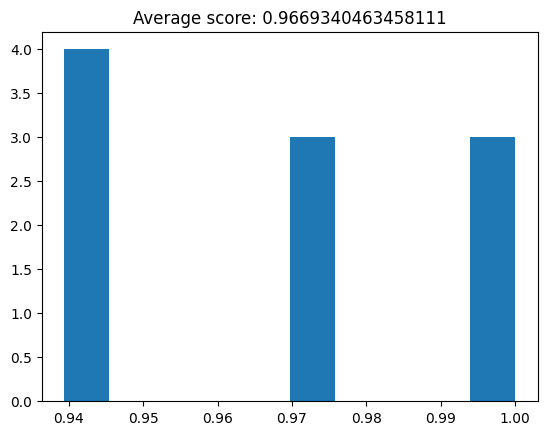


The histogram shows the distribution of accuracy scores from the 10-fold cross-validation. Each bar shows how many folds achieved accuracies within a specific range. Most scores are high and close to 1.0, indicating that the model performs well and consistently across different folds. However, the very high training accuracy may also suggest some overfitting.


In [718]:
"""
Q3b (3 marks)
Train and evaluate a Decision Tree:
1. Create a Decision Tree with default parameters (random_state=42)
2. Evaluate the model:
   - Fit on training data (numerical features only)
   - Print training and test accuracy score for this tree
   - Perform 10-fold cross-validation
   - Print mean and std of cross-validation scores and build cv_scores histogram.
   - What does the histogram show?
"""

from sklearn.model_selection import cross_val_score

# Create Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train
decision_tree_classifier.fit(X_train, y_train)

# Training and test accuracy scores
train_acc = decision_tree_classifier.score(X_train, y_train)
test_acc = decision_tree_classifier.score(X_test, y_test)

print("Training accuracy score:", train_acc)
print("Test accuracy score:", test_acc)

# 10-fold Cross-validation
cv_scores = cross_val_score(decision_tree_classifier, X, y, cv=10)

# Mean and std of cross-validation scores
print("Mean cross-validation score:", cv_scores.mean())
print("Std cross-validation score:", cv_scores.std())

# cv_scores histogram
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))
plt.show()

print("\nThe histogram shows the distribution of accuracy scores from the 10-fold \
cross-validation. Each bar shows how many folds achieved accuracies within a specific \
range. Most scores are high and close to 1.0, indicating that the model performs well \
and consistently across different folds. However, the very high training accuracy may \
also suggest some overfitting.")

Best score: 0.9640819964349376
Best parameters: {'max_depth': 5, 'max_features': 3}


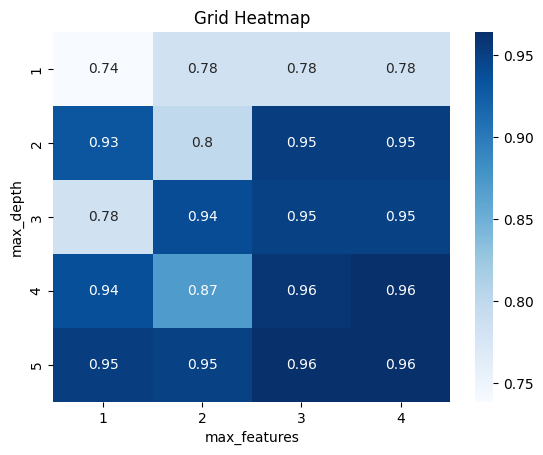

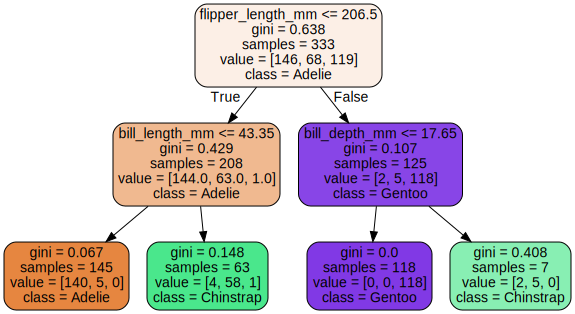

In [719]:
"""
Q3c (3 marks)
Analyze the best model from grid search:
- Initialize parameter_grid, cross_validation using StratifiedKFold
- Identify the best parameters for the tree and show the grid heatmap (don't forget labels)
- Plot the best tree structure using graphviz, use max_depth=2 (for better display)

Note: when using export_graphviz set out_file=None and use display(graph) function call, where
graph is your variable instantiated with Source(dot_data)
Export_graphviz Documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.export_graphviz.html
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.tree import export_graphviz
from graphviz import Source

# Initialize parameter_grid and cross_validation using StratifiedKFold
parameter_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': [1, 2, 3, 4]
}

cross_validation = StratifiedKFold(n_splits=10)

# Run grid search over parameter combinations
grid_search = GridSearchCV(
    decision_tree_classifier,
    param_grid=parameter_grid,
    cv=cross_validation
)

grid_search.fit(X, y)

# Identify the best parameters for the tree
print('Best score:', grid_search.best_score_)
print('Best parameters:', grid_search.best_params_)

# Show grid heatmap of cross-validation scores
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)

sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.title('Grid Heatmap')
plt.show()

# Plot the best tree structure using graphviz
best_tree = DecisionTreeClassifier(
    max_depth=2,
    max_features=grid_search.best_params_['max_features'],
    random_state=42
)

best_tree.fit(X, y)

dot_data = export_graphviz(
    best_tree,
    out_file=None,
    max_depth=2,
    feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],
    class_names=['Adelie', 'Chinstrap', 'Gentoo'],
    filled=True,
    rounded=True,
    precision=3
)

graph = Source(dot_data)
display(graph)


## Section 4: Missing_Sex Prediction (4 marks)
In this part of the assignment, we are building a model to infer the missing values from the original dataset to fix the broken records.


In [720]:
"""
Q4a (2 marks)
Prepare data for sex prediction:
- Use the clean dataset (no missing values) from Section 2
- Convert species to numeric values.

Note: Unlike the example in the tutorial, we will use a more straightforward method, LabelEncoder().

For this task, you just need to instantiate it, use the fit_transform method on the "species" column,
and reassign or add the column.
See documentation for details:
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

- Create new feature/label split using "sex" as target
- Scale features using StandardScaler().fit_transform(features) as in Tutorial
See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Split data into training (80%) and test (20%) sets
- Train these classifiers:
  * Logistic Regression (solver='lbfgs')
  * Decision Tree (max_depth=3)
  * KNN (n_neighbors=5)
  * SVM (kernel="linear", C=0.025)
- Compare models using (Providing values for each would be enough):
  * Training and test accuracy
  * 10-fold cross-validation scores


"""

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert species to numeric values using LabelEncoder
le = LabelEncoder()
penguins_clean = penguins_clean.copy()
penguins_clean["species_encoded"] = le.fit_transform(penguins_clean["species"])

# Create feature and label split
X = penguins_clean[['bill_length_mm', 'bill_depth_mm',
                    'flipper_length_mm', 'body_mass_g', "species_encoded"]]
y = penguins_clean["sex"]

# Scale features using StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Train classifiers: Logistic Regression, Decision Tree, KNN, SVM
classifier_names = ["Logistic Regression", "Decision Tree", "KNN", "Linear SVM"]


classifiers = [
    LogisticRegression(solver='lbfgs'),   # Logistic Regression
    DecisionTreeClassifier(max_depth=3),  # Decision Tree Classifier (max tree depth of 3)
    KNeighborsClassifier(5),              # K-Nearest-Neighbours Classifier, looking at five closest points
    SVC(kernel="linear", C=0.025),        # Linear SVM Classifier with C as penalty parameter for misclassified points
    ]

# Compare models using training and test accuracy and 10-fold CV
for name, clf in zip(classifier_names, classifiers):
    clf.fit(X_train, y_train)

    train_acc = clf.score(X_train, y_train)
    test_acc = clf.score(X_test, y_test)
    cv_scores = cross_val_score(clf, X_scaled, y, cv=10)

    print(f"\n{name}")
    print("Training accuracy:", train_acc)
    print("Test accuracy:", test_acc)
    print("CV mean accuracy:", cv_scores.mean())



Logistic Regression
Training accuracy: 0.9135338345864662
Test accuracy: 0.9104477611940298
CV mean accuracy: 0.9009803921568629

Decision Tree
Training accuracy: 0.9398496240601504
Test accuracy: 0.835820895522388
CV mean accuracy: 0.870855614973262

KNN
Training accuracy: 0.9511278195488722
Test accuracy: 0.9253731343283582
CV mean accuracy: 0.9011586452762923

Linear SVM
Training accuracy: 0.9022556390977443
Test accuracy: 0.9104477611940298
CV mean accuracy: 0.8947415329768272


In [721]:
"""
Q4b (2 marks)
Use best model to predict missing sex:
- Make sure to create new variable for subset to work with and copy your variable with missing records into it,
using new_var = your_variable.copy().
- Print records with missing sex values from section 2.
- Remove records that have missing values other than sex using dropna: df.dropna(subset=['column_name'],inplace=True).
- Scale features using StandardScaler().fit_transform(features) as in Q3
- Create new features/labels variables for the new dataset.

- Select best classifier based on test performance from Q4a

- For each record in missing_sex dataset, using best_model.predict(features) and best_model.predict_proba(features)
- Add missing values to the clean dataset and make sure there are no missing values.
"""

# Create new variable for subset
missing_sex_copy = missing_sex.copy()

# Print records with missing sex values
print("Records with missing sex values:\n")
print(missing_sex_copy)

# Remove records that have missing values other than sex
missing_sex_copy.dropna(subset=[
    "bill_length_mm",
    "bill_depth_mm",
    "flipper_length_mm",
    "body_mass_g",
    "species"
], inplace=True)

# Convert species to numeric values
missing_sex_copy["species_encoded"] = le.fit_transform(missing_sex_copy["species"])

# Create feature and label split for the new dataset
X_missing = missing_sex_copy[['bill_length_mm', 'bill_depth_mm',
                              'flipper_length_mm', 'body_mass_g', "species_encoded"]]

# Scale features using StandardScaler
X_missing_scaled = StandardScaler().fit_transform(X_missing)

# The best classifier based on test performance from Q4a is KNN
best_model = KNeighborsClassifier(n_neighbors=5)

# Train
best_model.fit(X_train, y_train)

# Predict missing sex and probabilities for each record
predicted_sex = best_model.predict(X_missing_scaled)
predicted_probs = best_model.predict_proba(X_missing_scaled)

# Add predicted sex back into the missing dataset
missing_sex_copy["sex"] = predicted_sex

# Add missing values to the clean dataset and confirm no missing sex remains
penguins_filled = penguins_clean.copy()
penguins_filled = pd.concat([penguins_filled, missing_sex_copy], ignore_index=True)

print("\nMissing sex count after fill:", penguins_filled["sex"].isnull().sum())


Records with missing sex values:

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8    

#### Congratulations! What you just did is called **model-based multiple imputation**. It is one of the methods used to treat missing data.

## Signature:
Don't forget to insert your name and student number and execute.

In [722]:
# Provide your Signarure:
%load_ext watermark
%watermark -a 'Saja Fawagreh, #101217326' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn,graphviz

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Saja Fawagreh, #101217326

Python implementation: CPython
Python version       : 3.12.12
IPython version      : 7.34.0

numpy     : 2.0.2
pandas    : 2.2.2
sklearn   : 1.6.1
matplotlib: 3.10.0
seaborn   : 0.13.2
graphviz  : 0.21

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.6.105+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

